### Importing Important and Relevant Libraries

In [147]:
#imported the necessary libraries
import warnings
warnings.filterwarnings("ignore")


#imported other Python library's
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFECV
import statsmodels.api as sm
import scipy.stats as stats

### Reading and Understanding the Data
### Importing the data of the Bike Sharing Company

In [54]:
data = pd.read_csv("day.csv")
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [3]:
print(data.shape)
print(data.info())

(730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [4]:
data.describe().round(1)

instant  season     yr   mnth  holiday  weekday  workingday  \
count    730.0   730.0  730.0  730.0    730.0    730.0       730.0   
mean     365.5     2.5    0.5    6.5      0.0      3.0         0.7   
std      210.9     1.1    0.5    3.5      0.2      2.0         0.5   
min        1.0     1.0    0.0    1.0      0.0      0.0         0.0   
25%      183.2     2.0    0.0    4.0      0.0      1.0         0.0   
50%      365.5     3.0    0.5    7.0      0.0      3.0         1.0   
75%      547.8     3.0    1.0   10.0      0.0      5.0         1.0   
max      730.0     4.0    1.0   12.0      1.0      6.0         1.0   

       weathersit   temp  atemp    hum  windspeed  casual  registered     cnt  
count       730.0  730.0  730.0  730.0      730.0   730.0       730.0   730.0  
mean          1.4   20.3   23.7   62.8       12.8   849.2      3658.8  4508.0  
std           0.5    7.5    8.2   14.2        5.2   686.5      1559.8  1936.0  
min           1.0    2.4    4.0    0.0        1.5     2.0        20.0    22.0  
25%           1.0   13.8   16.9   52.0        9.0   316.2      2502.2  3169.8  
50%           1.0   20.5   24.4   62.6       12.1   717.0      3664.5  4548.5  
75%           2.0   26.9   30.4   73.0       15.6  1096.5      4783.2  5966.0  
max           3.0   35.3   42.0   97.2       34.0  3410.0      6946.0  8714.0

In [5]:
# check null values
print(data.duplicated().sum())

0


### Conclusion
- There are no null values and duplicates in the variables. <br>
- The data types are correctly assigned to the important variables except for "dteday" variable.

In [5]:
print(data.columns)
print(len(data.columns))

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
16


## Identify Categorical and Numeric Variables

In [6]:
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday','weathersit']
num_var = ['temp','atemp','hum','windspeed','casual','registered','cnt']

### Check outliers for Numerical variables

### Univariant Analysis

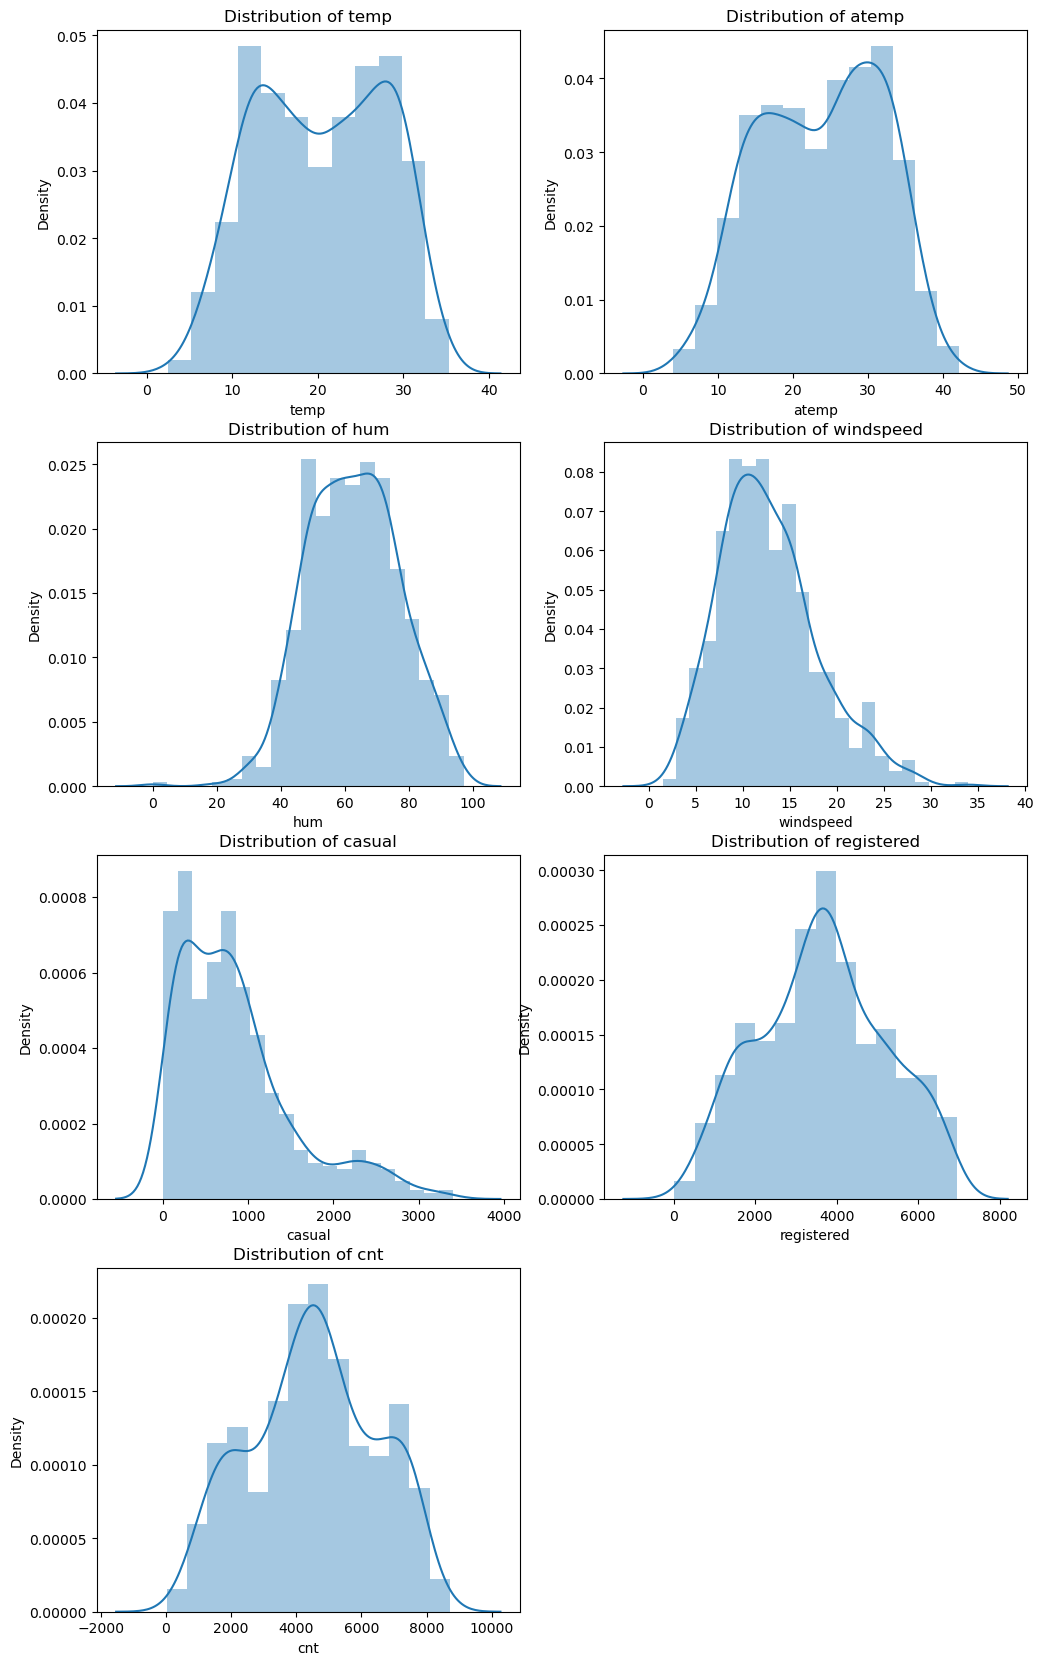

In [7]:
plt.figure(figsize=(12,18))
for i, v in enumerate (num_var):
    plt.subplot(4,2,i+1)
    sns.distplot(data[v])
    plt.title('Distribution of '+v)
    plt.xlabel(v)
    plt.ylabel('Density')
    plt.subplots_adjust(bottom=0.001)
plt.show()

### Conclusions
- There are no oultliers in the numerical variables, as all the data values are within in the boundary of the distribution curve.

In [8]:
print(data[(data['casual'] + data['registered']) == data['cnt']].shape)
print((data['casual'] + data['registered']).sum())
print(data['cnt'].sum())

(730, 16)
3290845
3290845


### Conclusion
- Confirming that the sum of 'casual' and 'registered' is equal to 'cnt' ans the data points and sum are matching.

### Bi-Variant Analysis

<AxesSubplot:xlabel='season'>

<Figure size 1000x500 with 0 Axes>

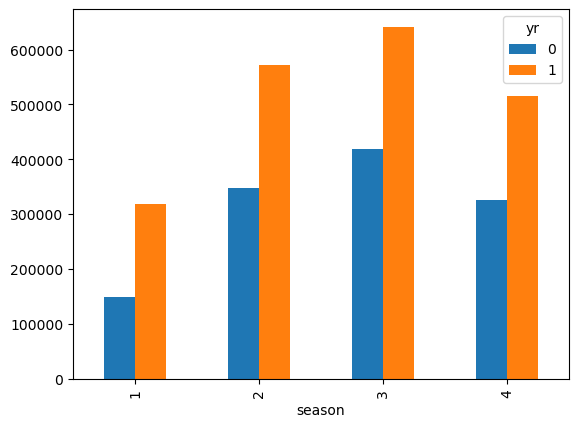

In [9]:
##Store the table in a separate variable
plt.figure(figsize=(10,5))
biv = pd.pivot_table(data=data, values="cnt", index="season", columns="yr",  aggfunc=sum)
biv.plot(kind='bar')

<Figure size 1800x1400 with 0 Axes>

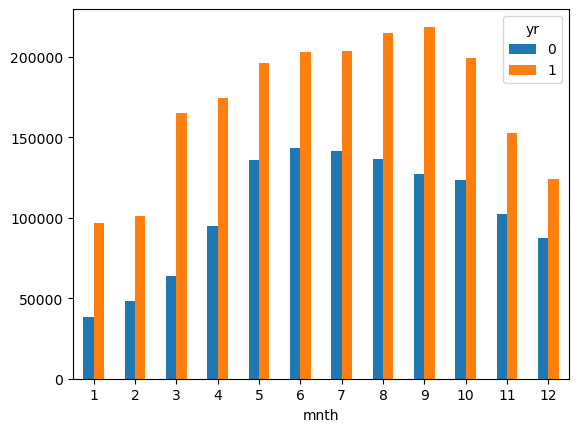

In [10]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data, values="cnt", index="mnth", columns="yr",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 1800x1400 with 0 Axes>

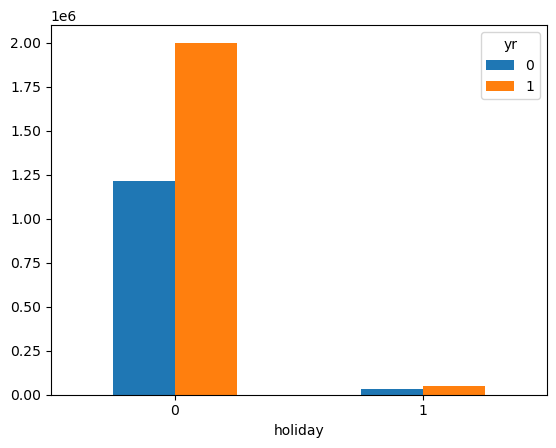

In [11]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data, values="cnt", index="holiday", columns="yr",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 1800x1400 with 0 Axes>

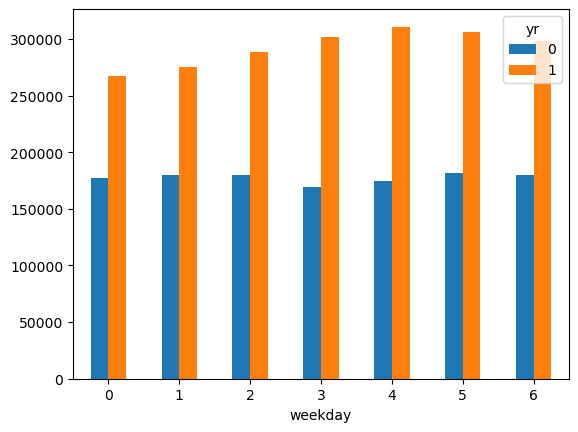

In [12]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data, values="cnt", index="weekday", columns="yr",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 1800x1400 with 0 Axes>

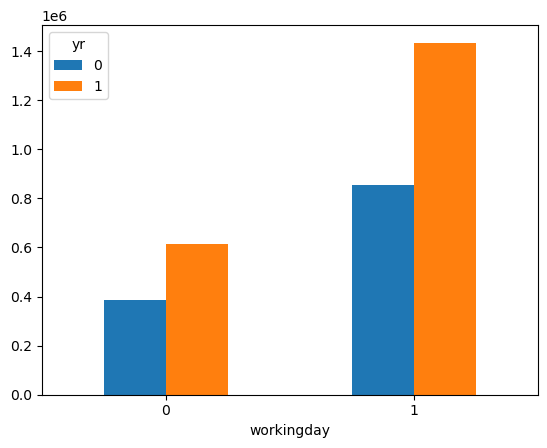

In [13]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data, values="cnt", index='workingday', columns="yr",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

<Figure size 1800x1400 with 0 Axes>

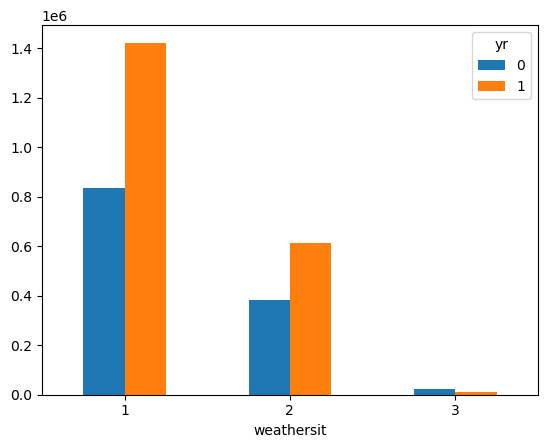

In [15]:
##Store the table in a separate variable
plt.figure(figsize=(18,14))
biv = pd.pivot_table(data=data, values="cnt", index="weathersit", columns="yr",  aggfunc=sum)
biv.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

### Visualising Categorical Variables usng Box Plot as per Instructor session to re-confirm

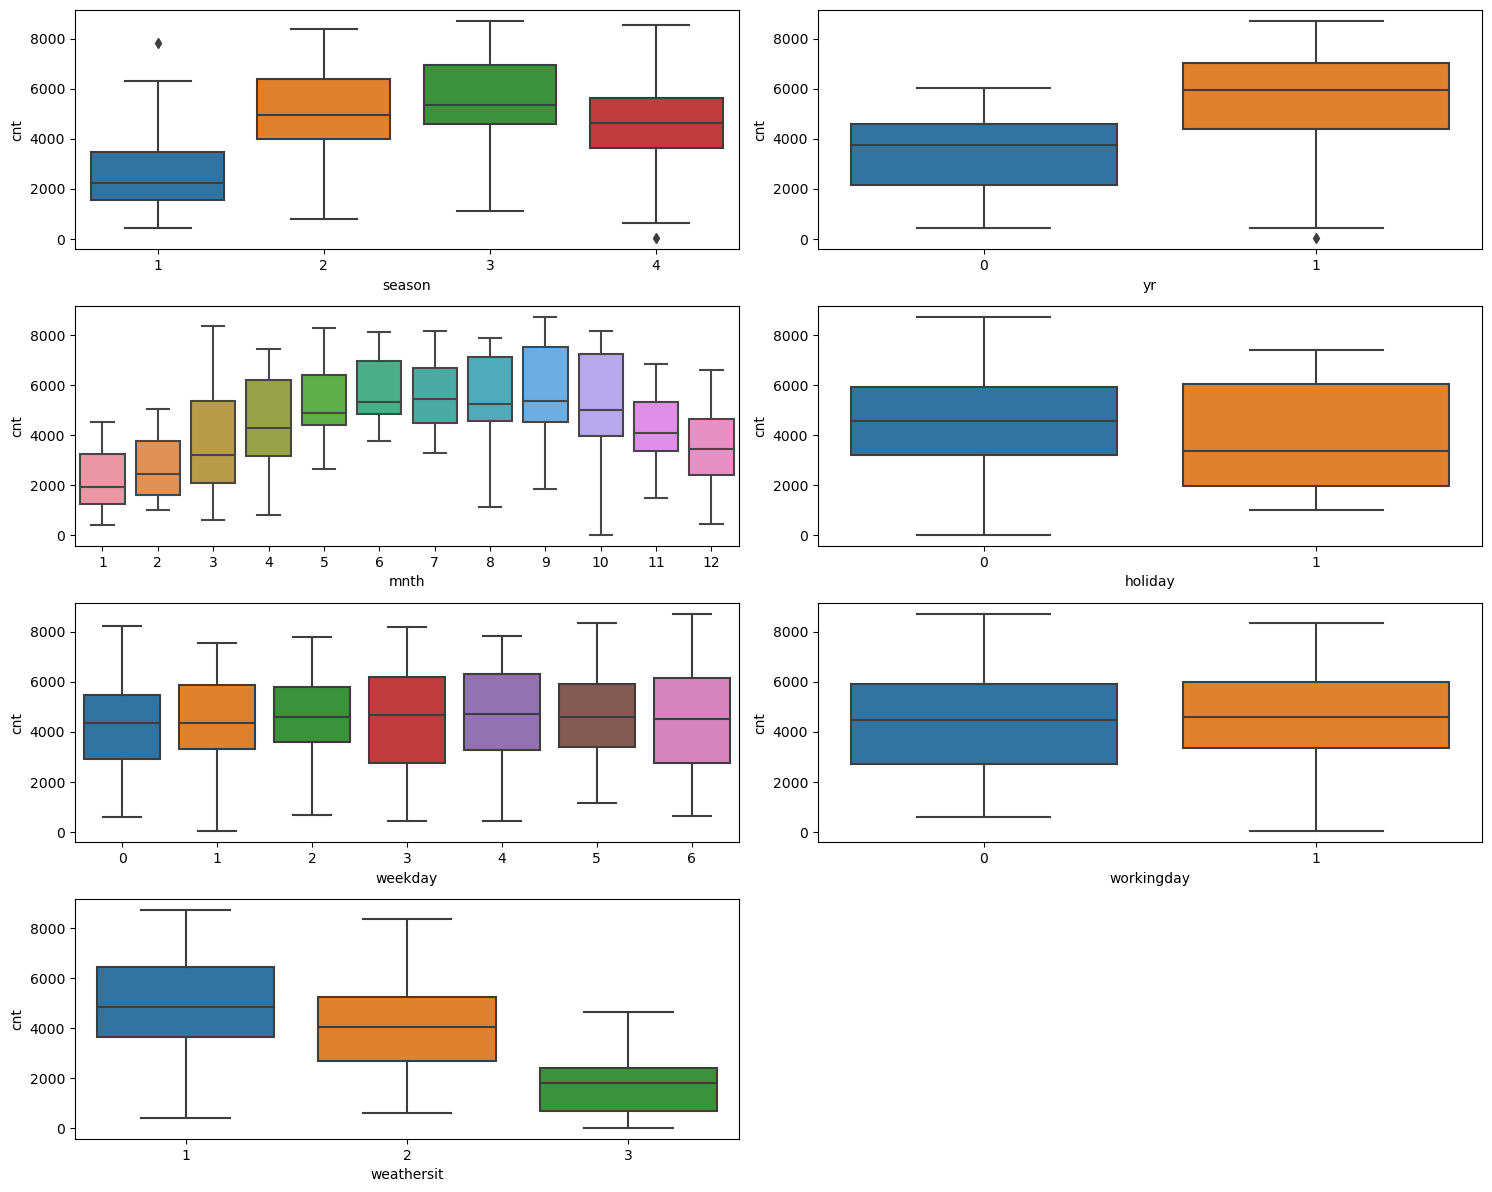

In [17]:
plt.figure(figsize=(15,12))
for i in list(enumerate(cat_var)):
    plt.subplot(4,2,i[0]+1)
    sns.boxplot(x = i[1], y = 'cnt', data = data)
plt.tight_layout(pad = 1)    
plt.show()

### Conclusions from Bi-Variant Analysis
- The bike demand is high when weather is clear and few clouds. However, the demand is less in case of Light snow and light rainfall. No conclusion can be made to Light Snow, Light Rain due to lack of data.
- Bike demand in the season of 'fall' is high when compared with other seasons and is consistent for 2018 and 2019 years.
- Bike demand is significantly high when it is not a holiday against when it is a holiday.
- Bike demand during May to July months is high for the year 2018. Also, the demand for Bike during June to September months is high for the year 2019.
- The demand of bike is almost same throughout the weekdays for the year 2018. However, for the year 2019, the demand for bike is slightly increasing during weekday 3, 4 and 5.
- There is increase in bike demand during working day against non-working day for the year 2019 when compared to year 2018.

### Data Visualisation

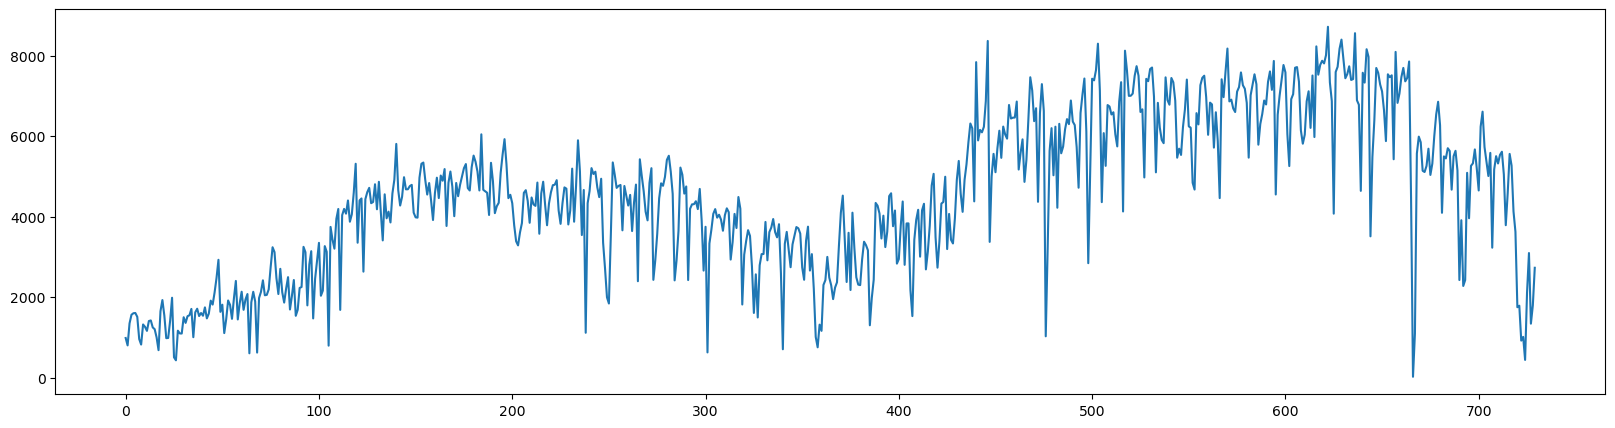

In [18]:
# Checking pattern of target - 'cnt' over period of two years
plt.figure(figsize=(20,5))
plt.plot(data.cnt)
plt.show()

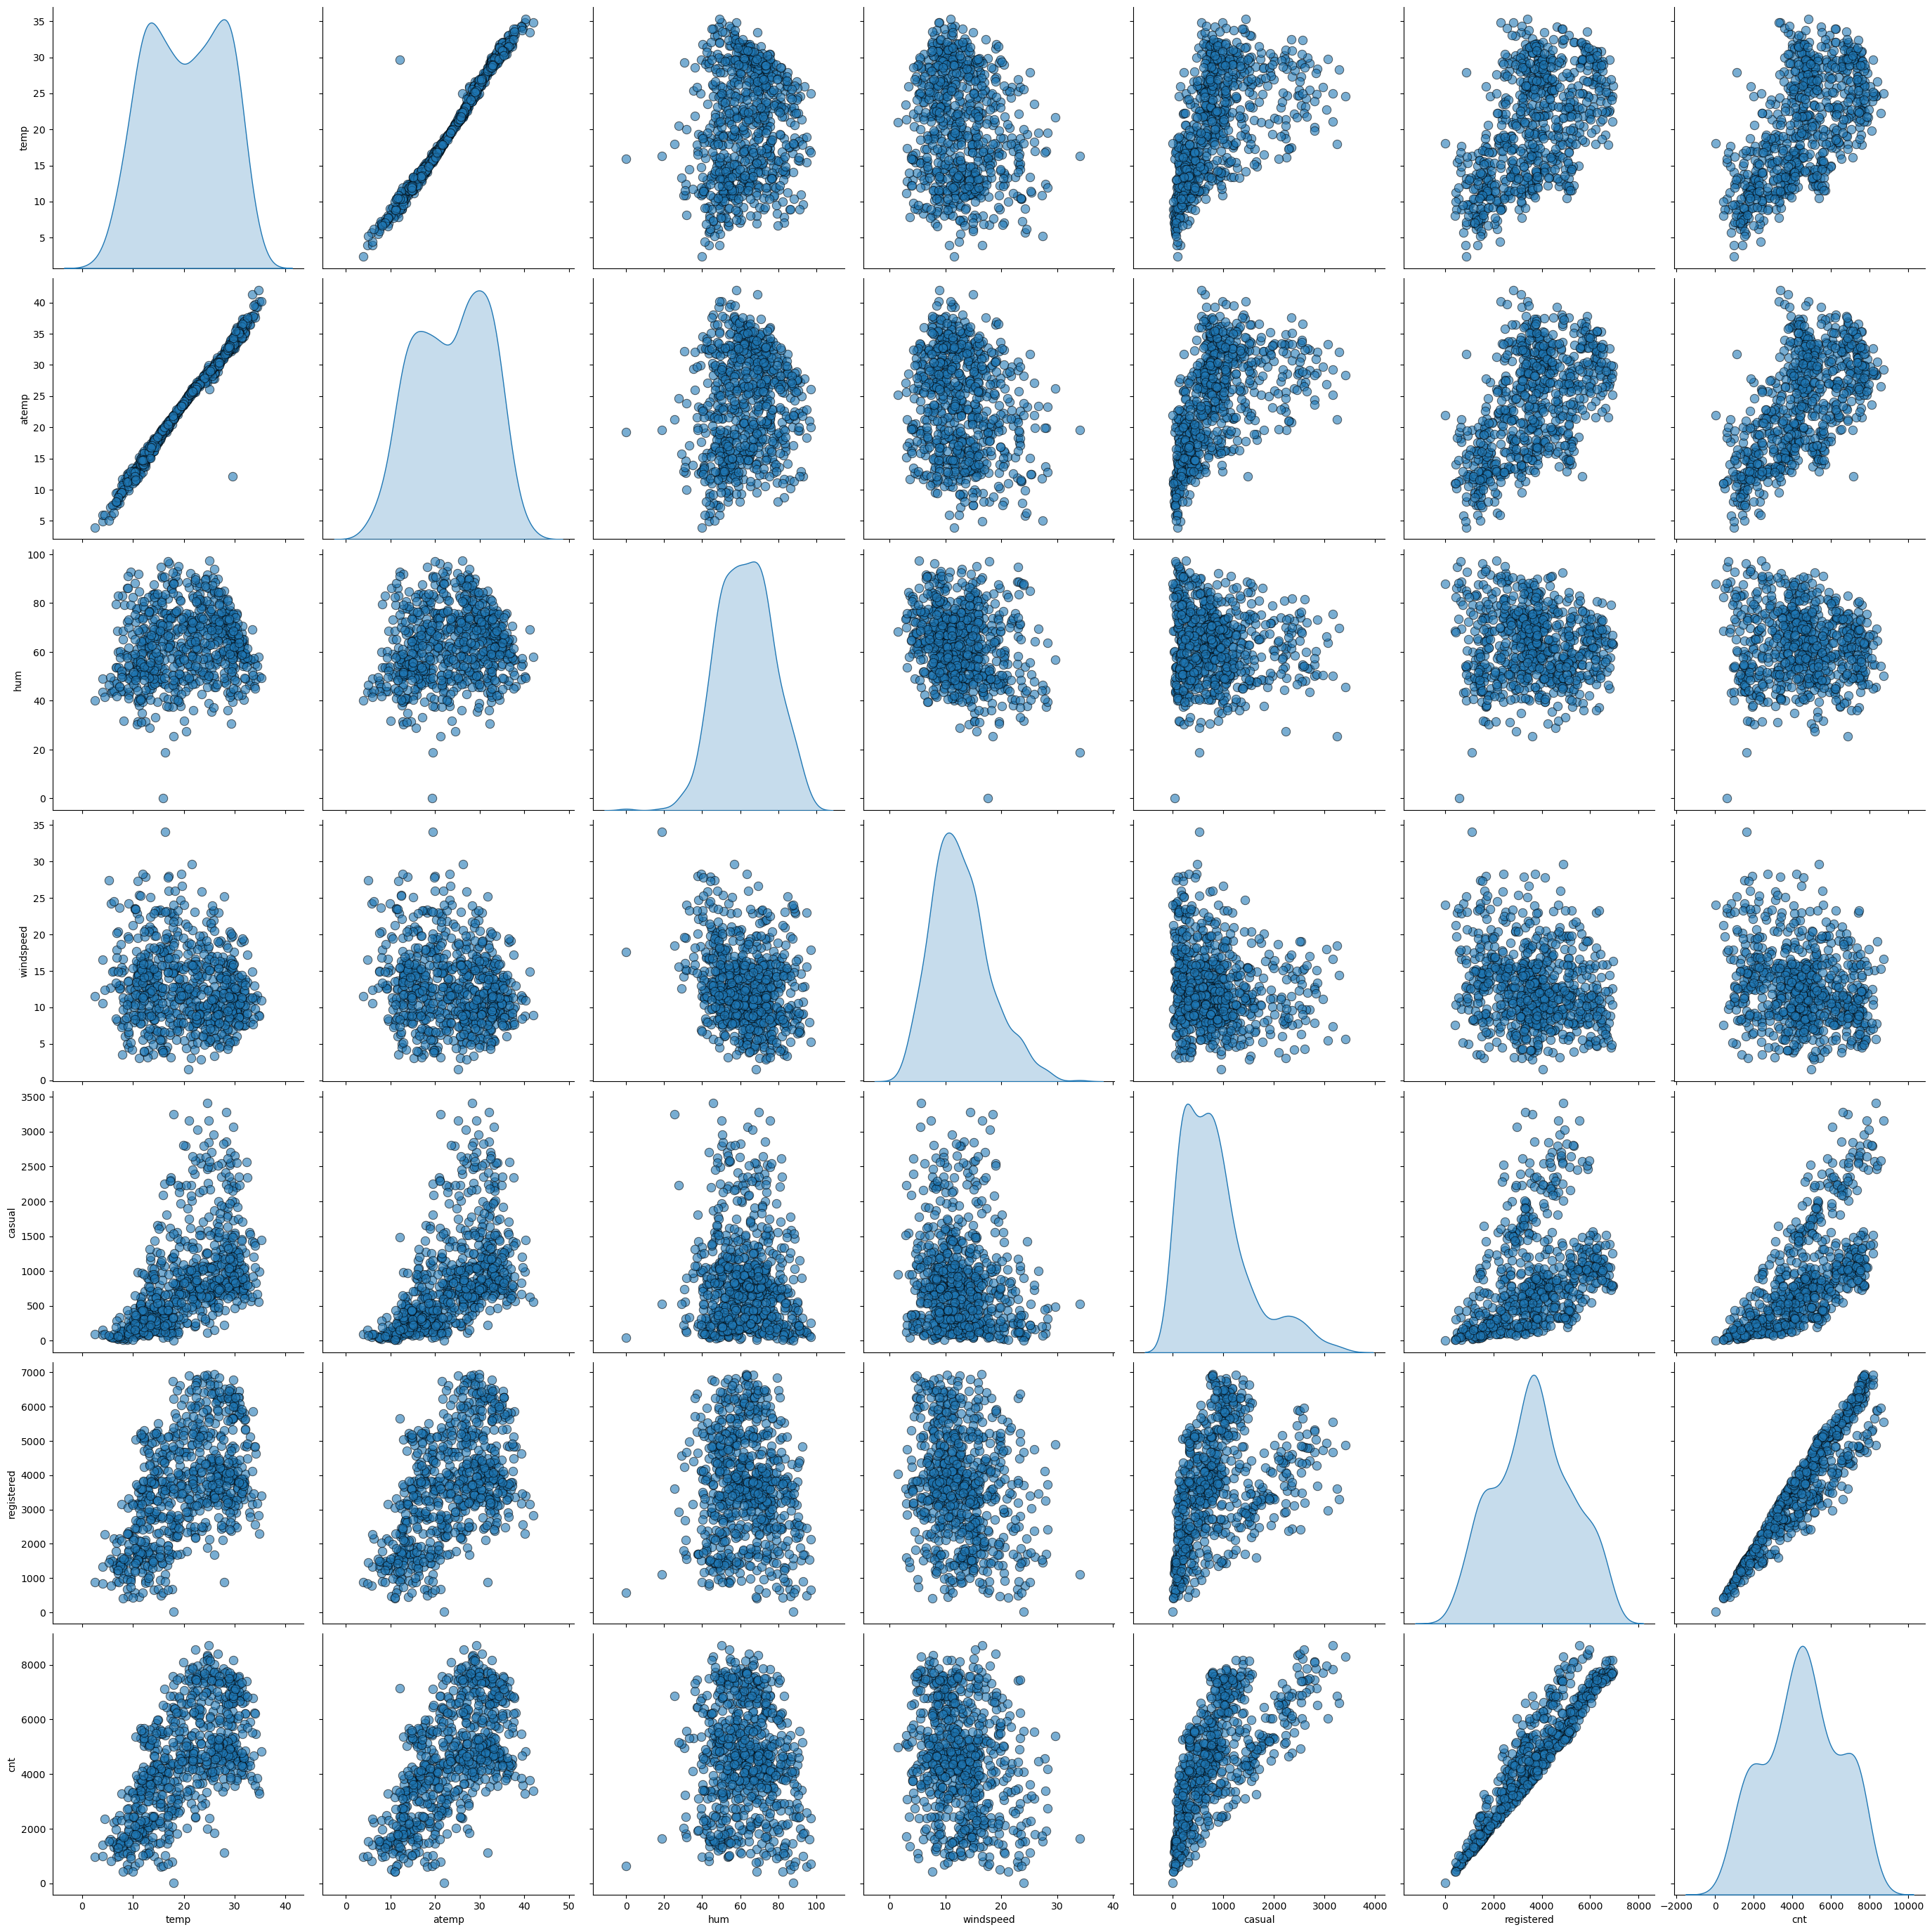

In [19]:
#pairplot for all numerical variables
sns.pairplot(data[num_var], diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()

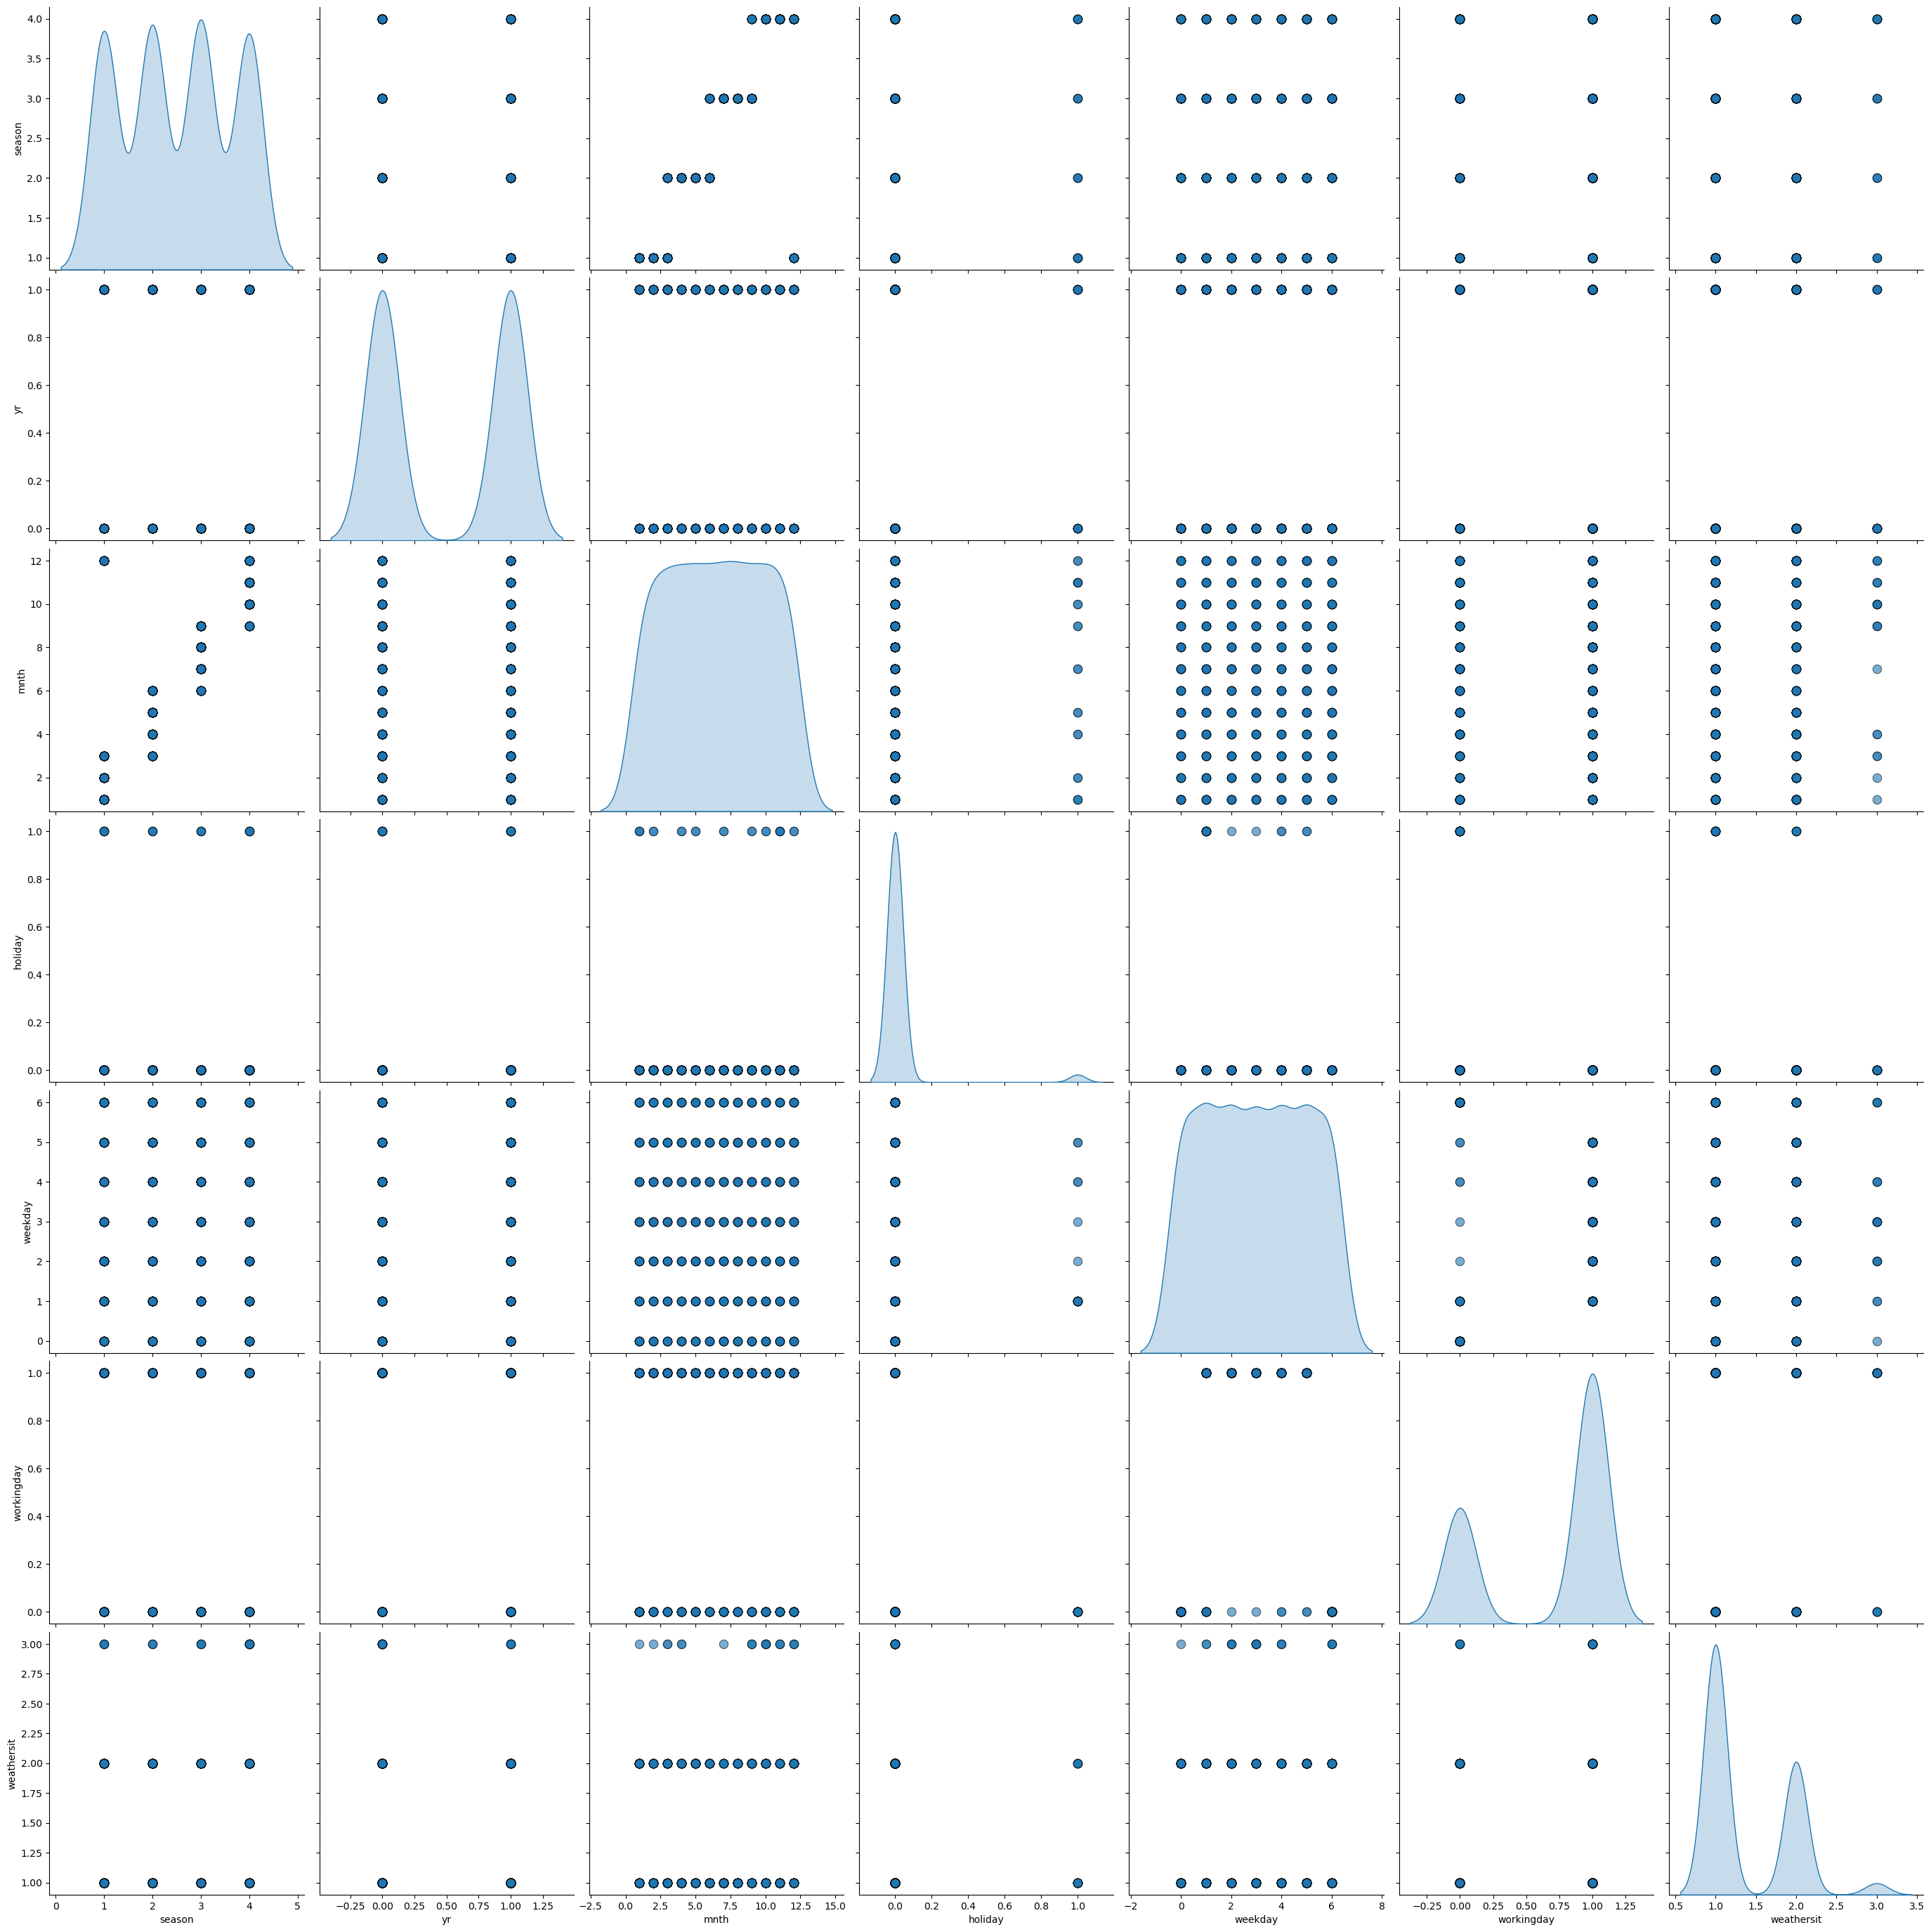

In [20]:
#pairplot for all categorical variables
sns.pairplot(data[cat_var], diag_kind = 'kde',plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},size = 4)
plt.show()

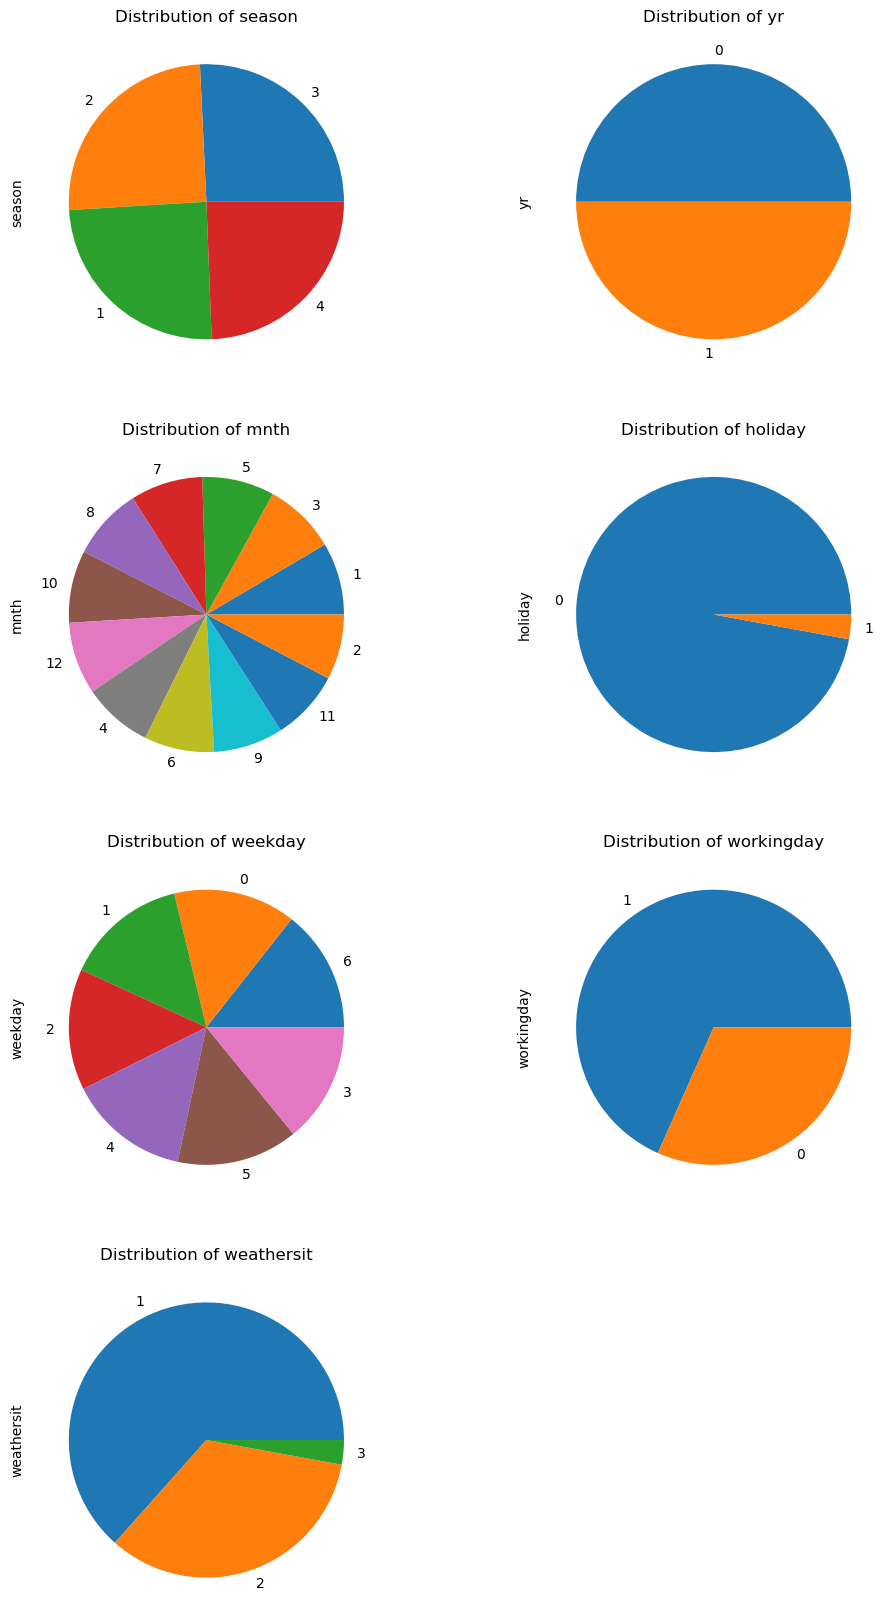

In [21]:
#checking distribution of categorical variables using pie plots
plt.figure(figsize=(12,18))
for i,v in enumerate(cat_var):
    plt.subplot(4,2,i+1)
    data[v].value_counts().plot.pie()
#    sns.distplot(data[v])
    plt.title('Distribution of ' + v)
#    plt.xlabel(v)
#    plt.ylabel('Density')
    plt.subplots_adjust(bottom = 0.001)
plt.show()

### Conclusion
- From the distribution plot of variables in diagonals we can conclude that there are no outliers.

#### Removing redundant features

In [55]:
data.drop(['instant', 'casual', 'registered', 'dteday'], axis=1, inplace=True)
print(data.shape)
data.head()

(730, 12)


season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

Droping off redundant variables :<br> - 'dteday'- feeling temperature <br> - 'casual' - count of casual users <br> - 'registered' - count of registered users 

### Data Setting i.e, dummy variable creation

In [56]:
# dtype converting
data[['season', 'weathersit']] = data[['season', 'weathersit']].astype(object) 
# dummy variable creation
dummy_vars = pd.get_dummies(data[['season','weathersit']],drop_first=True)
#adding to original dataset
data = pd.concat([data,dummy_vars], axis = 1) 
#removing extra columns
data.drop(['season','weathersit'], axis=1, inplace=True)
#checking dataset to confirm the changes
data.head()

yr  mnth  holiday  weekday  workingday       temp     atemp      hum  \
0   0     1        0        6           0  14.110847  18.18125  80.5833   
1   0     1        0        0           0  14.902598  17.68695  69.6087   
2   0     1        0        1           1   8.050924   9.47025  43.7273   
3   0     1        0        2           1   8.200000  10.60610  59.0435   
4   0     1        0        3           1   9.305237  11.46350  43.6957   

   windspeed   cnt  season_2  season_3  season_4  weathersit_2  weathersit_3  
0  10.749882   985         0         0         0             1             0  
1  16.652113   801         0         0         0             1             0  
2  16.636703  1349         0         0         0             0             0  
3  10.739832  1562         0         0         0             0             0  
4  12.522300  1600         0         0         0             0             0

Test-Train Split

In [109]:
#creating test and train dataset
data_train, data_test = train_test_split(data, train_size= 0.7, random_state=100)
print(data_train.shape)
print(data_test.shape)

(510, 15)
(220, 15)


In [110]:
#rescaling numerical variables using MinMaxScaler
#calling scaler
scaler = MinMaxScaler()
#list of columns to be scaled
num_vars = ['mnth','weekday','temp', 'atemp', 'hum', 'windspeed', 'cnt']
#column scaling
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])
#checking dataset
data_train.head()

yr      mnth  holiday   weekday  workingday      temp     atemp  \
576   1  0.545455        0  0.333333           1  0.815169  0.766351   
426   1  0.181818        0  1.000000           0  0.442393  0.438975   
728   1  1.000000        0  0.000000           0  0.245101  0.200348   
482   1  0.272727        0  1.000000           0  0.395666  0.391735   
111   0  0.272727        0  0.833333           1  0.345824  0.318819   

          hum  windspeed       cnt  season_2  season_3  season_4  \
576  0.725633   0.264686  0.827658         0         1         0   
426  0.640189   0.255342  0.465255         0         0         0   
728  0.498067   0.663106  0.204096         0         0         0   
482  0.504508   0.188475  0.482973         1         0         0   
111  0.751824   0.380981  0.191095         1         0         0   

     weathersit_2  weathersit_3  
576             0             0  
426             1             0  
728             0             0  
482             1             0  
111             1             0

In [59]:
data_train.describe()

yr        mnth     holiday     weekday  workingday        temp  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.503743    0.025490    0.498366    0.676471    0.537440   
std      0.500429    0.315038    0.157763    0.336182    0.468282    0.225858   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.181818    0.000000    0.166667    0.000000    0.339853   
50%      1.000000    0.545455    0.000000    0.500000    1.000000    0.542596   
75%      1.000000    0.818182    0.000000    0.833333    1.000000    0.735215   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            atemp         hum   windspeed         cnt    season_2    season_3  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.513156    0.650480    0.320883    0.513499    0.247059    0.262745   
std      0.212410    0.145846    0.169803    0.224421    0.431725    0.440557   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.332086    0.538643    0.199179    0.356420    0.000000    0.000000   
50%      0.529718    0.653714    0.296763    0.518638    0.000000    0.000000   
75%      0.688457    0.754830    0.414447    0.684710    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         season_4  weathersit_2  weathersit_3  
count  510.000000    510.000000    510.000000  
mean     0.247059      0.345098      0.029412  
std      0.431725      0.475867      0.169124  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000

### Training the train data set

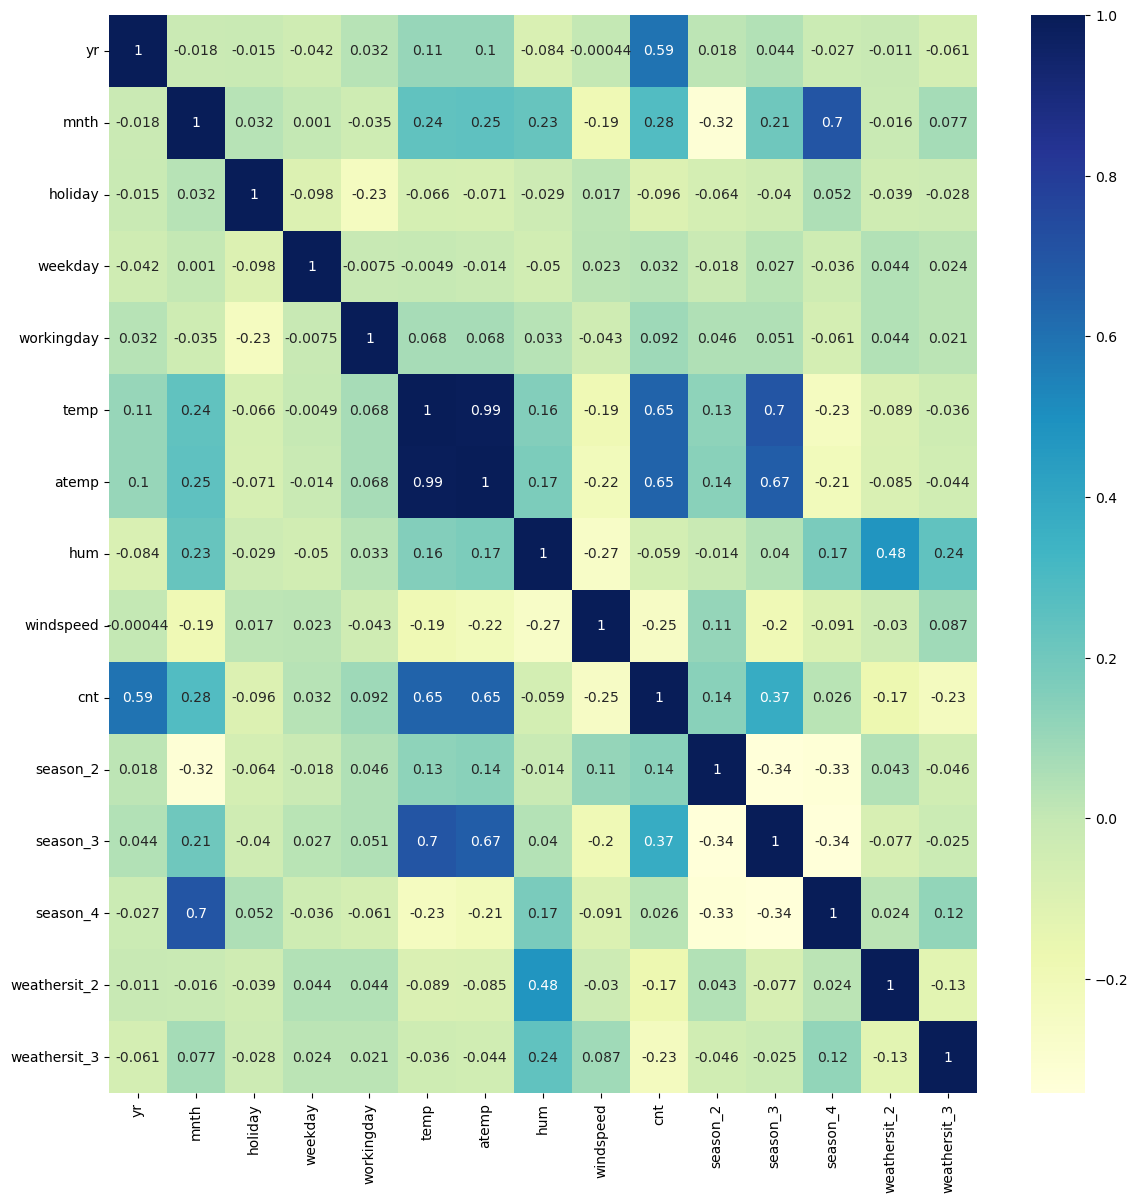

In [161]:
#Checking the correlation between variables
plt.figure(figsize=(14,14))
sns.heatmap(data_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [61]:
y_train = data_train.pop('cnt')
X_train = data_train

### Building a linear module with all the variables

In [62]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())


### Checking VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

const           0.170472
yr              0.232202
mnth            0.014917
holiday        -0.063803
weekday         0.048312
workingday      0.018725
temp            0.432883
atemp           0.062811
hum            -0.128079
windspeed      -0.178342
season_2        0.116788
season_3        0.069488
season_4        0.152949
weathersit_2   -0.056571
weathersit_3   -0.246252
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     176.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          3.01e-182
Time:                        12:34:13   Log-Likelihood:                 495.79
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:             

Features     VIF
5           temp  386.65
6          atemp  365.03
7            hum   17.88
1           mnth   13.81
10      season_3    8.23
11      season_4    7.15
8      windspeed    3.97
9       season_2    3.55
4     workingday    3.14
3        weekday    3.03
12  weathersit_2    2.15
0             yr    2.04
13  weathersit_3    1.19
2        holiday    1.10

- The p-value of all variable 'atemp' and 'mnth' coeffcients are not-significant as P-value is more than 0.05.
- The variable 'atemp' has high VIF and P-value.
- Since 'temp' and 'atemp' has high correlation with target variable 'cnt'. we shall first remove 'atemp' and check.

In [63]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', 1,)

In [64]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_2.summary())

# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     190.7
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.35e-183
Time:                        12:35:17   Log-Likelihood:                 495.69
No. Observations:                 510   AIC:                            -963.4
Df Residuals:                     496   BIC:                            -904.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1714      0.030      5.790   

Features    VIF
5           temp  22.90
6            hum  17.52
1           mnth  13.81
9       season_3   8.13
10      season_4   7.15
7      windspeed   3.84
8       season_2   3.55
4     workingday   3.14
3        weekday   3.03
11  weathersit_2   2.15
0             yr   2.04
12  weathersit_3   1.18
2        holiday   1.09

- The p-value of all variable 'mnth' coeffcient is not-significant as P-value is more than 0.05.
- The variable 'temp', 'mnth' and 'hum' has high VIF.
- Since 'mnth' is high correlation with variable 'temp' than 'hum'. we shall first remove 'mnth' and check.

In [65]:
X = X.drop('mnth', 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_3.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.89e-184
Time:                        12:35:28   Log-Likelihood:                 495.52
No. Observations:                 510   AIC:                            -965.0
Df Residuals:                     497   BIC:                            -910.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1724      0.030      5.841   

Features    VIF
4           temp  22.83
5            hum  16.74
8       season_3   6.48
6      windspeed   3.82
7       season_2   3.38
3     workingday   3.14
2        weekday   3.01
9       season_4   2.47
10  weathersit_2   2.13
0             yr   2.03
11  weathersit_3   1.17
1        holiday   1.09

- The p-value of all variable  'holiday' and 'workingday' coeffcients is not-significant as P-value is more than 0.05.
- The variable 'hum' and 'temp' has high VIF.
- Since 'temp' is high correlation with target variable 'cnt'. we shall first remove 'hum' and check.

In [66]:
X = X.drop('hum', 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_4.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     220.5
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.17e-183
Time:                        12:35:54   Log-Likelihood:                 490.20
No. Observations:                 510   AIC:                            -956.4
Df Residuals:                     498   BIC:                            -905.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1000      0.019      5.147   

Features    VIF
4           temp  15.85
7       season_3   6.19
5      windspeed   3.62
6       season_2   3.35
3     workingday   2.95
2        weekday   2.89
8       season_4   2.38
0             yr   2.03
9   weathersit_2   1.52
10  weathersit_3   1.08
1        holiday   1.07

- The p-value of all variable  'holiday' and 'workingday' coeffcients is not-significant as P-value is more than 0.05.
- The variable 'season_3' and 'temp' has high VIF.
- Since 'temp' is high correlation with target variable 'cnt'. we shall first remove 'season_3' and check.

In [67]:
X = X.drop('season_3', 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_5.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          3.12e-181
Time:                        12:36:26   Log-Likelihood:                 482.26
No. Observations:                 510   AIC:                            -942.5
Df Residuals:                     499   BIC:                            -895.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0854      0.019      4.412   

Features   VIF
4          temp  4.39
5     windspeed  3.44
3    workingday  2.94
2       weekday  2.88
0            yr  2.02
8  weathersit_2  1.52
6      season_2  1.51
7      season_4  1.39
9  weathersit_3  1.08
1       holiday  1.07

- The p-value of the 'holiday' and 'workingday' coeffcients is not-significant as P-value is more than 0.05.
- The VIF of all variables are less than 5.
- The variable 'workingday' has high VIF.
- Since 'workingday' has high P-value. we shall first remove 'workingday' and check.

In [68]:
X = X.drop('workingday', 1,)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_6 = sm.OLS(y_train, X_train_lm).fit()

# Print the summary of the model
print(lr_6.summary())

# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     257.8
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.59e-181
Time:                        12:37:13   Log-Likelihood:                 480.07
No. Observations:                 510   AIC:                            -940.1
Df Residuals:                     500   BIC:                            -897.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0986      0.018      5.384   

Features   VIF
3          temp  3.85
4     windspeed  3.32
2       weekday  2.85
0            yr  2.00
5      season_2  1.51
7  weathersit_2  1.50
6      season_4  1.38
8  weathersit_3  1.08
1       holiday  1.04

__After dropping redundant variables, we can confirm that both the VIF's and P-values are within an acceptable range i.e., VIF < 5 and P-value < 0.05. So we shall go ahead and make our predictions using lr_6 model only.__

## Residual Analysis of the train data

In [72]:
# Prediction on the y_train using lr_6 model
y_train_predict= lr_6.predict(X_train_lm)

Text(0.5, 0, 'Errors')

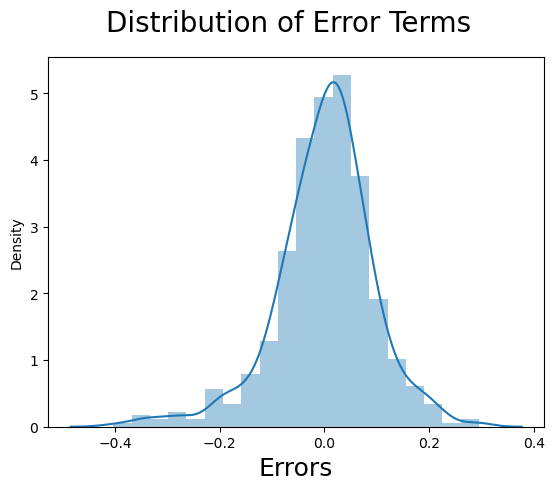

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predict), bins = 20)
fig.suptitle('Distribution of Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Check if Error terms are interdependent of each other

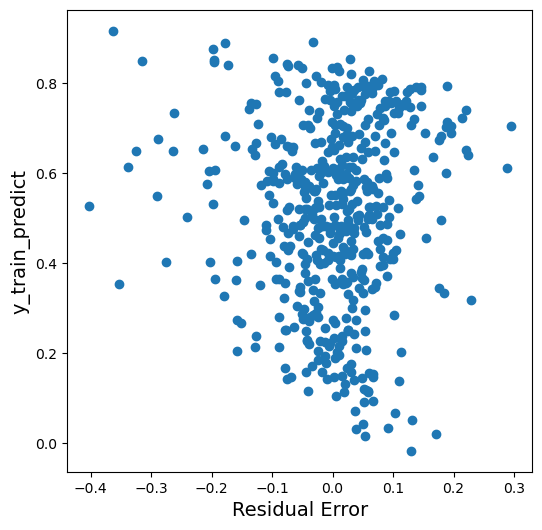

In [160]:
# Plotting y_test and y_test_pred to understand the spread\
plt.figure(figsize=(6,6))
plt.scatter((y_train - y_train_predict), y_train_predict)
plt.xlabel('Residual Error', fontsize = 14)  # X-label
plt.ylabel('y_train_predict', fontsize = 14)  # Y-label
plt.show()

__Error terms are normally distributed.__ <br> __No patter is observer in Error terms and they are indepedent of each other .__ <br> __Thus, the inferences from this model help the bussiness to corretcly predict the outcome.__

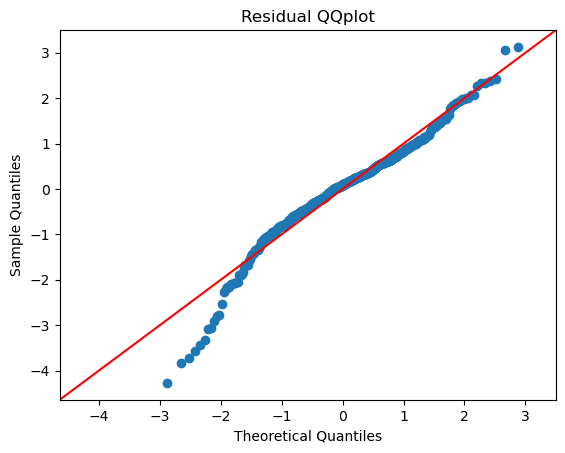

In [151]:
# plotting the Q-Q plot of residual against normal distribution
sm.qqplot(res, line='45',fit=True,dist=stats.norm)
plt.title('Residual QQplot')
plt.show()

__The above Q-Q plot says that the left tails deviating from the center line are above -2 std. dev. In a normal distribution, these theoretical extreme values will fall beyond 2 & -2 sigmas and hence this shape of the Q-Q plot considered to be followed a Normal Distribution.__

### Residual Calculation

In [116]:
res = y_train - y_train_predict

### Prediction and evaluation on test set

In [83]:
#rescaling the test data set
#create a list of features to be scaled
num_vars = ['mnth','weekday','temp', 'atemp', 'hum', 'windspeed', 'cnt']

#scaling the data
data_test[num_vars] = scaler.transform(data_test[num_vars])

data_test.head()

yr      mnth  holiday   weekday  workingday      temp     atemp  \
184   0  0.545455        1  0.166667           0  0.831783  0.769660   
535   1  0.454545        0  0.500000           1  0.901354  0.842587   
299   0  0.818182        0  0.666667           1  0.511964  0.496145   
221   0  0.636364        0  0.500000           1  0.881625  0.795343   
152   0  0.454545        0  0.666667           1  0.817246  0.741471   

          hum  windspeed       cnt  season_2  season_3  season_4  \
184  0.657364   0.084219  0.692706         0         1         0   
535  0.610133   0.153728  0.712034         1         0         0   
299  0.837699   0.334206  0.303382         0         0         1   
221  0.437098   0.339570  0.547400         0         1         0   
152  0.314298   0.537414  0.569029         1         0         0   

     weathersit_2  weathersit_3  
184             1             0  
535             0             0  
299             1             0  
221             0             0  
152             0             0

In [85]:
data_test.describe()

yr        mnth     holiday     weekday  workingday        temp  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.499174    0.036364    0.502273    0.700000    0.558718   
std      0.500809    0.311120    0.187620    0.330843    0.459303    0.233187   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.046591   
25%      0.000000    0.272727    0.000000    0.166667    0.000000    0.355429   
50%      0.000000    0.454545    0.000000    0.500000    1.000000    0.558172   
75%      1.000000    0.727273    0.000000    0.833333    1.000000    0.755981   
max      1.000000    1.000000    1.000000    1.000000    1.000000    0.984424   

            atemp         hum   windspeed         cnt    season_2    season_3  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.532847    0.638221    0.313293    0.522154    0.263636    0.245455   
std      0.217401    0.148694    0.159584    0.219163    0.441609    0.431338   
min      0.025950    0.261915   -0.042808    0.048205    0.000000    0.000000   
25%      0.344870    0.529197    0.198843    0.378595    0.000000    0.000000   
50%      0.544652    0.625590    0.300126    0.524678    0.000000    0.000000   
75%      0.713308    0.743798    0.402718    0.677750    1.000000    0.000000   
max      0.980934    1.002146    0.807474    0.963300    1.000000    1.000000   

         season_4  weathersit_2  weathersit_3  
count  220.000000    220.000000    220.000000  
mean     0.236364      0.318182      0.027273  
std      0.425817      0.466833      0.163248  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000

#### Dividing into X_test and y_test

In [86]:
#creating predictor and target variable from test set
y_test = data_test.pop('cnt')
X_test = data_test

#adding constant to dataset
X_test_m6 = sm.add_constant(X_test)

# Creating X_test_m6 dataframe by dropping variables from X_test_m6
X_test_m6 = X_test_m6.drop(["atemp","mnth","hum","season_3","workingday"], axis = 1)

In [89]:
# Making predictions using the sixth model

y_test_pred_m6 = lr_6.predict(X_test_m6)

### Model Evaluation 

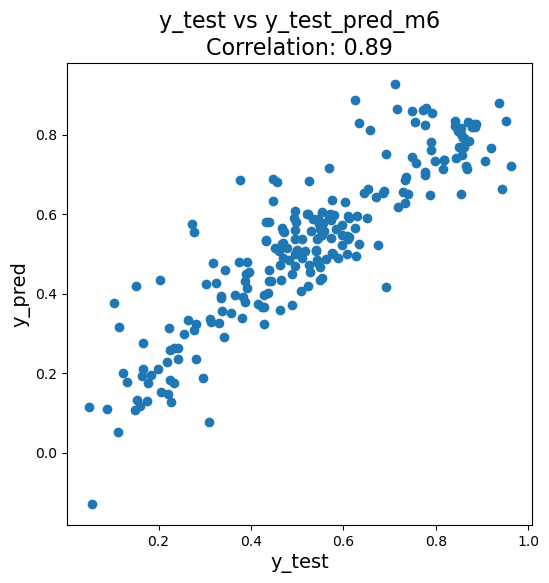

In [131]:
# Plotting y_test and y_test_pred to understand the spread
corr = round(np.corrcoef(y_test, y_test_pred_m6)[0][1],2)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred_m6)
plt.title('y_test vs y_test_pred_m6' + '\nCorrelation: ' + str(corr), fontsize=16)  #Plot heading 
plt.xlabel('y_test', fontsize = 14)  # X-label
plt.ylabel('y_pred', fontsize = 14)  # Y-label
plt.show()

### Calculating R-squared score on test data

In [100]:
#calculating R-squared score on predicted data
r2_score_test = r2_score(y_test, y_test_pred_m6)
round(r2_score_test,2)

0.79

#### The R-squared score on predicted data from test dataset is 0.79

#### From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 79% of bike demand. Coeffiencients of the variables explains the factors effecting the bike demand.

#### The equation of our best fitted line is:

- cnt=0.0986+(0.2335×yr)+(-0.0786xholiday)+(0.0521×weekday)+(0.5755×temp)+(-0.1663xwindspeed)+(0.0767×season_2)+(0.1280×season_4)+(-0.0755×weathersit_2)+(-0.2766×weathersit__3)

#### Based on final model top three features contributing significantly towards explaining the demand are:

- Actual Temperature (0.5755)
- weathersit_3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.2766)
- year (0.2335)

#### So it suggested to give these three variables the utmost importance while planning to achieve maximum demand.